In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# input Ex (from Br0 to Br12)
Ex = [-3666.65366132,
     -3.6754420815E+03,
     -3.6839027452E+03,
     -3.6931964747E+03,
     -3.7018743503E+03,
     -3.7108255544E+03,
     -3.7198376263E+03,
     -3.7291860202E+03,
     -3.7380176509E+03,
     -3.7476733273E+03,
     -3.7569261148E+03,
     -3.7659887746E+03,
     -3776.00723982
     ]

# create dataframe
df = pd.DataFrame({"x":np.linspace(0,1,13),"Ex": Ex})

# Ex per atom
df.Ex = df.Ex / 768

# set EBr and EI
EI = df.Ex[0]
EBr = df.Ex[12]

Text(0, 0.5, 'Free energy (eV/atom)')

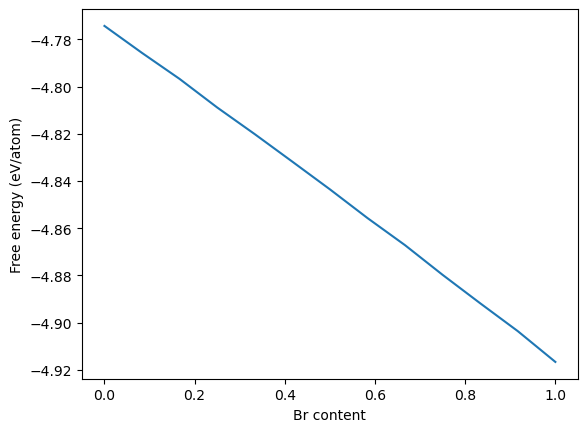

In [2]:
# show free energy per atom of mixing perovskite
plt.plot(df.x,df.Ex)
plt.xlabel('Br content')
plt.ylabel('Free energy (eV/atom)')

In [3]:
# calculate dH
df["dH"] = df.Ex - df.x * EBr - (1 - df.x) * EI

# turn eV into meV
df.dH = 1000*df.dH

# fitting dH points
def constrain(x,a):
    return -a*x**2+a*x

popt1, pcov1 = curve_fit(constrain, df.x, df.dH)
y_fit1 = constrain(np.linspace(0,1,100), *popt1)

Text(0, 0.5, 'Formation enthalpy (meV/atom)')

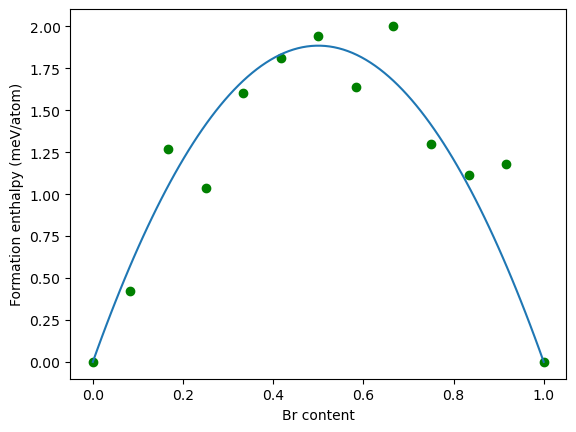

In [4]:
# draw formation enthalpy per atom
plt.scatter(df.x,df.dH, marker='o', color = "green")
plt.plot(np.linspace(0,1,100),y_fit1)
plt.xlabel('Br content')
plt.ylabel('Formation enthalpy (meV/atom)')

In [5]:
# input Boltzmann constant (eV/K)
k_B = 8.617333262145E-5

# calculate entropy change
df["dS"] = np.nan
middle = k_B * (df.x[1:12] * np.log(df.x[1:12]) + (1 - df.x[1:12]) * np.log((1-df.x[1:12])))
df.loc[1:11, "dS"] = middle.values
df.loc[0,"dS"] = 0
df.loc[12,"dS"] = 0

# 300K temperature and change to meV
df.dS = df.dS * 300000

Text(0, 0.5, 'Formation energy (meV/atom)')

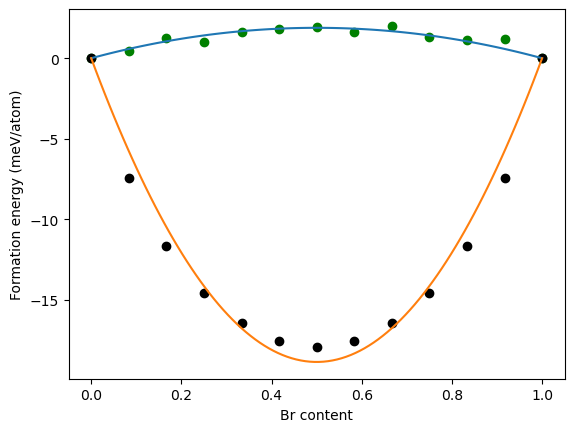

In [6]:
# fitting dS points
def constrain(x,a):
    return -a*x**2+a*x

popt2, pcov2 = curve_fit(constrain, df.x, df.dS)
y_fit2 = constrain(np.linspace(0,1,100), *popt2)



plt.scatter(df.x,df.dH, marker='o', color = "green")
plt.scatter(df.x,df.dS, marker='o', color = "black")
plt.plot(np.linspace(0,1,100),y_fit1)
plt.plot(np.linspace(0,1,100),y_fit2)
plt.xlabel('Br content')
plt.ylabel('Formation energy (meV/atom)')